# Project

We start by loading in the dataset with all high probability (0.7) elon musk quotes between 2015 and 2020 that mentions an organization according to spacy lg.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
elon_org_df = pd.read_csv('Data/org-lg-Elon Musk.csv.bz2')
elon_org_df

,ORG,date,numOccurrences,quotation,quoteID,probas
0,FILAMENTO,2015-03-16 12:32:13,1,Anyone who has used a 3D printer is aware of t...,2015-03-16-004684,"[['Elon Musk', '0.9319'], ['None', '0.0681']]"
1,Orbital Sciences,2015-07-21 18:52:01,4,"The last year has seen three failures: ours, O...",2015-07-21-089084,"[['Elon Musk', '0.973'], ['None', '0.027']]"
2,the Russian Progress,2015-07-21 18:52:01,4,"The last year has seen three failures: ours, O...",2015-07-21-089084,"[['Elon Musk', '0.973'], ['None', '0.027']]"
3,Falcon,2015-12-22 07:57:19,4,11 satellites deployed to target orbit and Fal...,2015-12-22-000553,"[['Elon Musk', '0.9318'], ['None', '0.0665'], ..."
4,Blue Origin,2015-11-29 20:14:20,2,Congrats to Jeff Bezos and the Blue Origin tea...,2015-11-29-012454,"[['Elon Musk', '0.9274'], ['None', '0.0693'], ..."
...,...,...,...,...,...,...
5829,C19,2020-03-13 00:00:00,7,"As a basis for comparison, the risk of death f...",2020-03-13-005119,"[['Elon Musk', '0.7845'], ['None', '0.212'], [..."
5830,youtube,2020-01-10 00:00:00,1,I was sitting in the middle row of my X and I ...,2020-01-10-035268,"[['Elon Musk', '0.7643'], ['None', '0.2357']]"
5831,NASA,2020-02-11 17:35:22,2,NASA called and told us that we'd won a ($1.6 ...,2020-02-11-061218,"[['Elon Musk', '0.8313'], ['None', '0.1625'], ..."
5832,FSD,2020-03-05 10:06:08,3,Perhaps they weren't aware that the computer i...,2020-03-05-052924,"[['Elon Musk', '0.95'], ['None', '0.05']]"


---
Then we make a dataframe that shows the most common organizations

In [2]:
org_count_df = elon_org_df.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_df.head(20)

,ORG,counts
745,Tesla,2208
685,SpaceX,159
295,Falcon Heavy,127
104,BFR,123
514,NASA,94
76,Apple,94
815,Twitter,64
317,Ford,62
284,Falcon,57
287,Falcon 9,52


---
Here we plot the stockprice for the last company, in the two weeks following the quote.

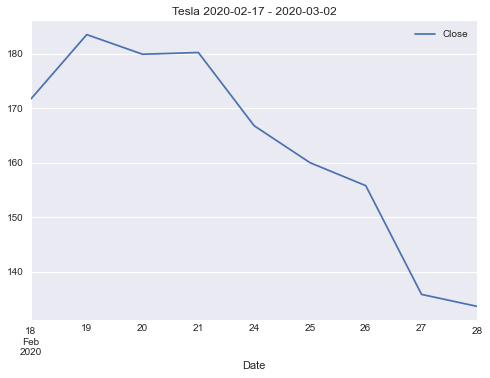

,Close
Date,
2020-02-18,171.679993
2020-02-19,183.483994
2020-02-20,179.882004
2020-02-21,180.199997
2020-02-24,166.757996
2020-02-25,159.981995
2020-02-26,155.759995
2020-02-27,135.800003
2020-02-28,133.598007


In [3]:
from financials import stock_history
from financials import get_dates

start_date, end_date = get_dates(elon_org_df.iloc[-1]['date'], 2, 0)
stock_df = stock_history(elon_org_df.iloc[-1]['ORG'], start_date, end_date, plot=True)
stock_df

---
Here we make a dataframe with only quotes that contain the company Apple

In [4]:
apples = elon_org_df[elon_org_df['ORG'] == 'Apple']
apples

,ORG,date,numOccurrences,quotation,quoteID,probas
7,Apple,2015-10-09 11:30:14,1,They have hired people we've fired. We always ...,2015-10-09-112605,"[['Elon Musk', '0.9157'], ['None', '0.0843']]"
18,Apple,2015-10-09 16:50:01,1,We always jokingly call Apple the `Tesla Grave...,2015-10-09-123220,"[['Elon Musk', '0.8365'], ['None', '0.1635']]"
24,Apple,2015-05-06 23:48:00,3,I actually hope Apple gets into the car busine...,2015-05-06-014632,"[['Elon Musk', '0.7976'], ['None', '0.2024']]"
29,Apple,2015-12-26 06:45:28,1,Important engineers? Apple hired people we've ...,2015-12-26-017915,"[['Elon Musk', '0.9534'], ['None', '0.0466']]"
37,Apple,2015-12-14 22:52:19,1,' Tesla graveyard.' If you don't make it at Te...,2015-12-14-000484,"[['Elon Musk', '0.8681'], ['None', '0.1011'], ..."
...,...,...,...,...,...,...
3958,Apple,2018-11-03 12:36:08,1,I still use an iPhone and everything. But Appl...,2018-11-03-022176,"[['Elon Musk', '0.7474'], ['None', '0.2526']]"
4242,Apple,2018-11-02 20:02:14,1,"And so Apple did that for a long time, I still...",2018-11-02-006794,"[['Elon Musk', '0.8878'], ['None', '0.1122']]"
5082,Apple,2019-07-23 14:00:00,7,"If you don't make it at Tesla, you go work at ...",2019-07-23-028560,"[['Elon Musk', '0.9015'], ['None', '0.0985']]"
5125,Apple,2019-01-08 21:20:50,1,more important to society than [ Apple founder...,2019-01-08-054226,"[['Elon Musk', '0.8839'], ['None', '0.1161']]"


---
Finally we plot all the graphs of the following weeks after 'apple quotes'

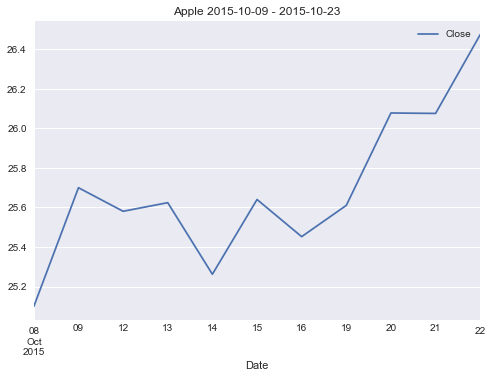

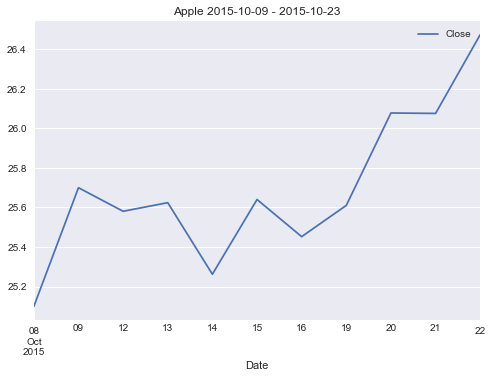

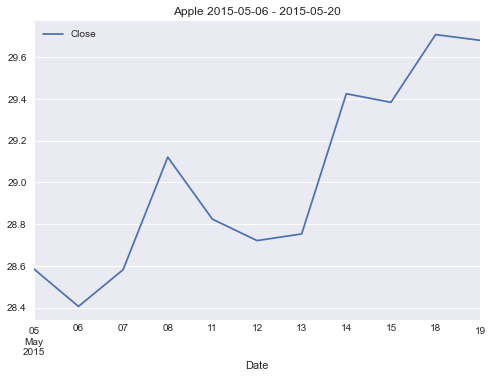

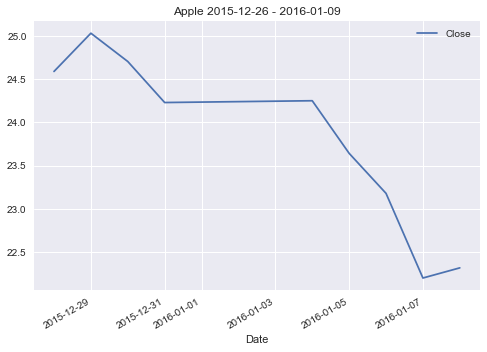

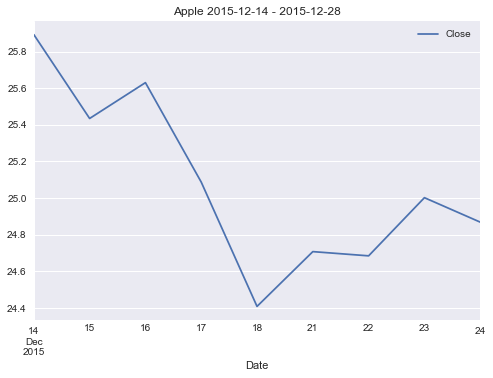

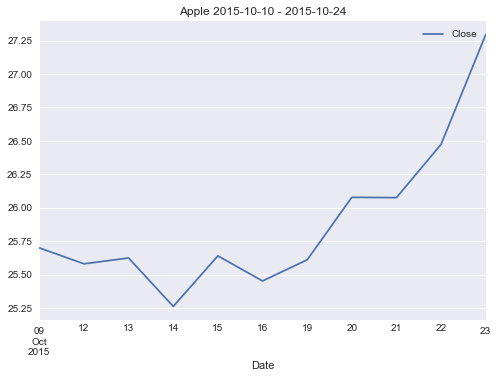

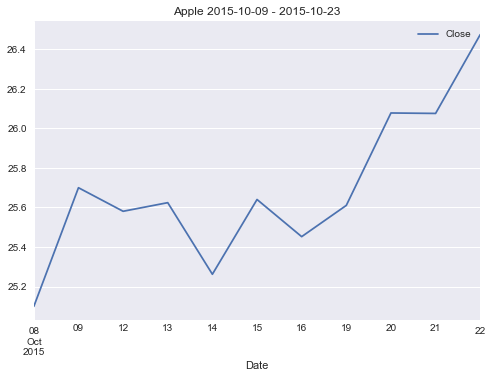

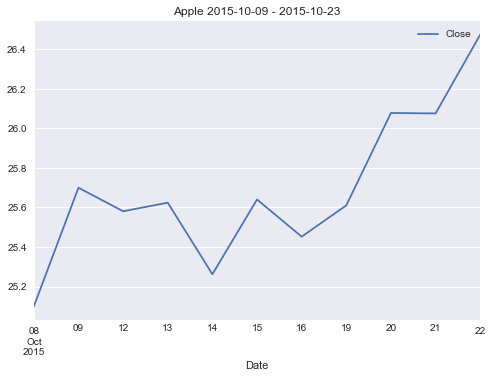

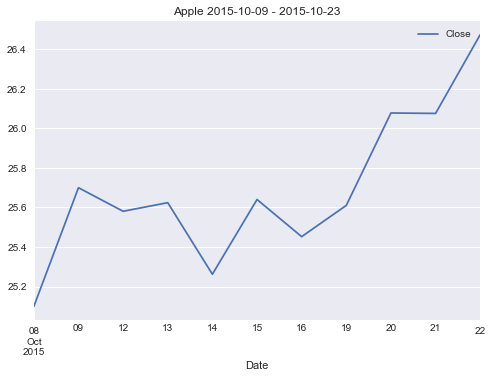

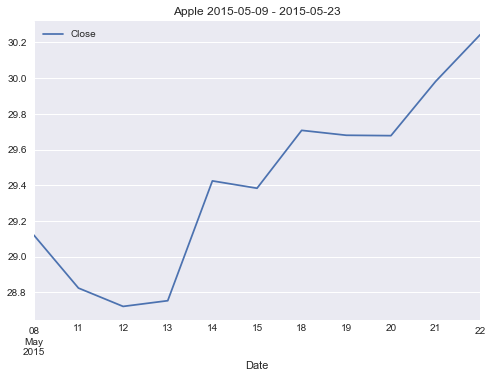

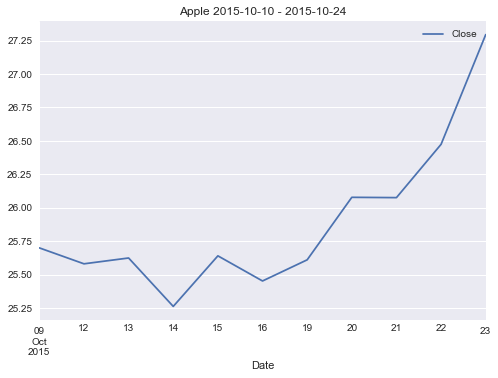

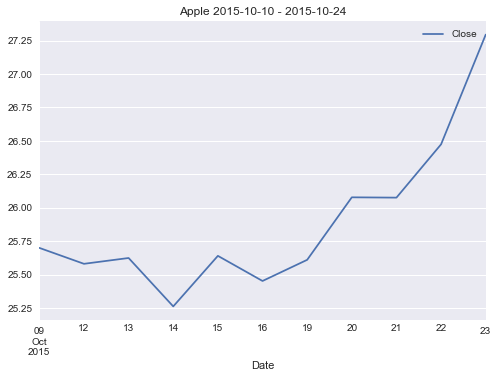

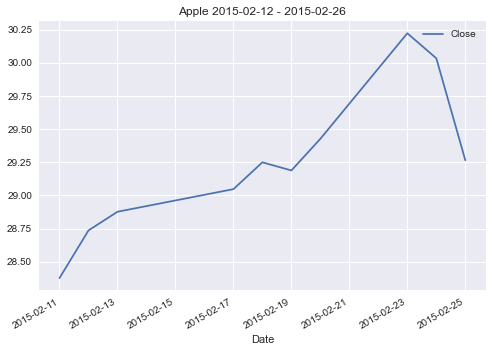

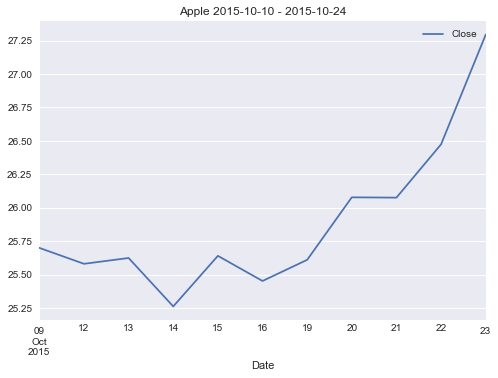

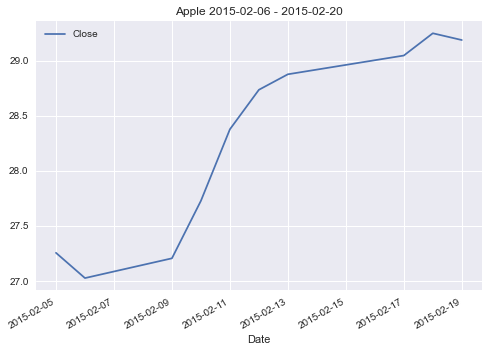

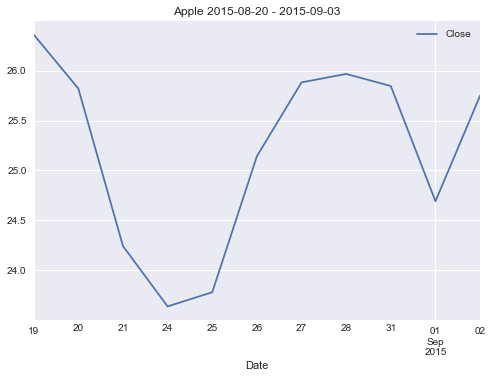

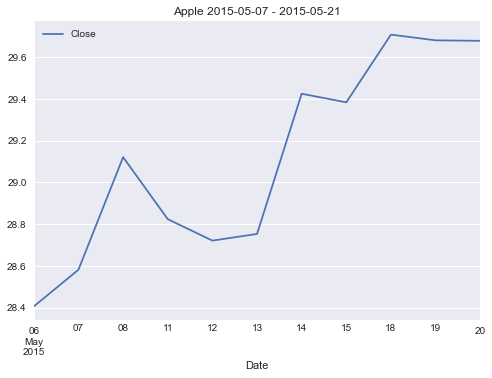

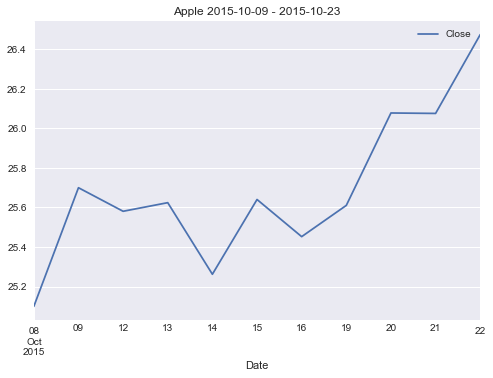

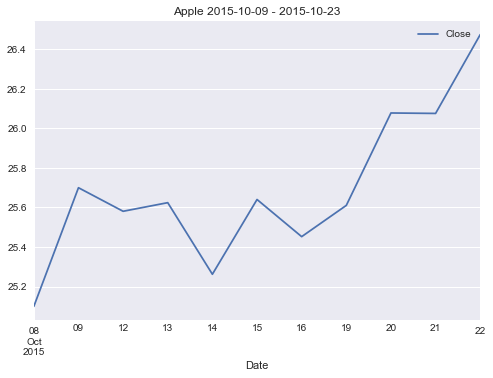

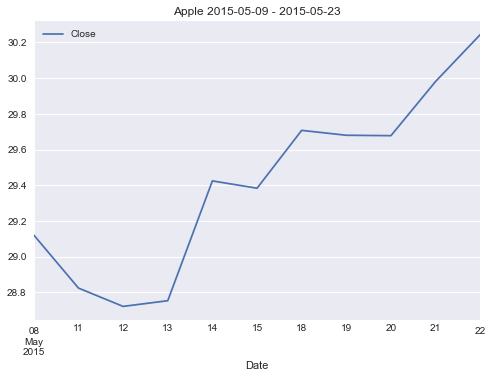

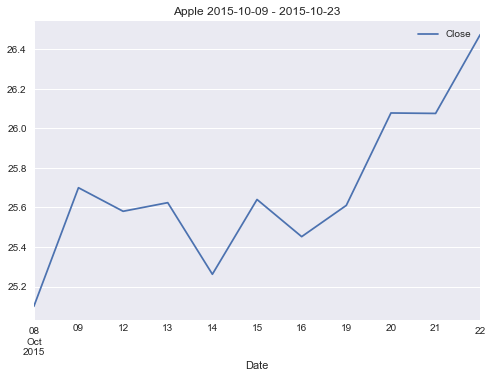

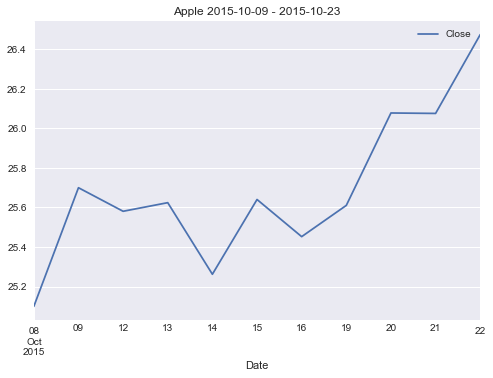

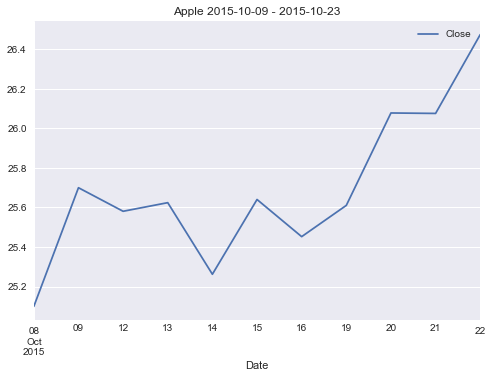

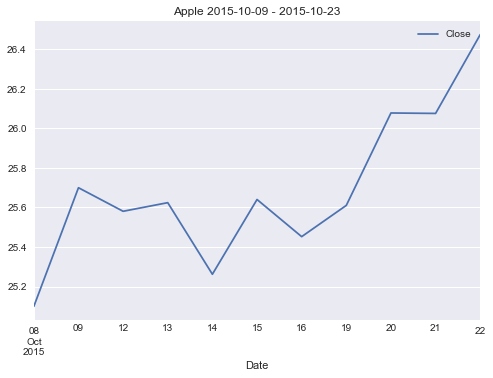

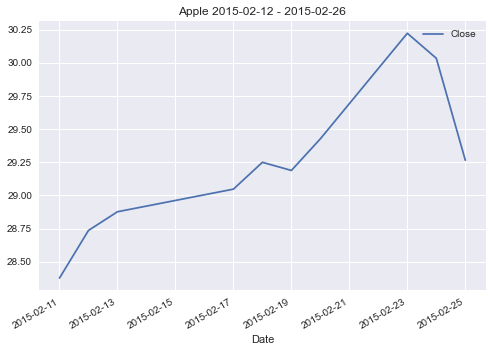

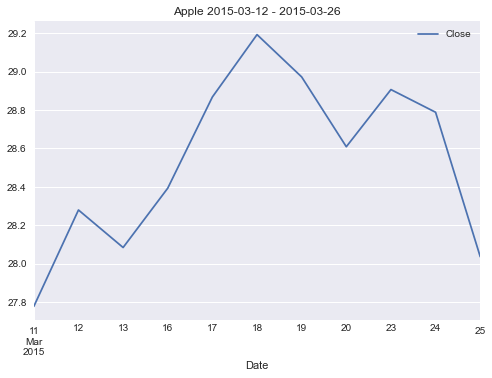

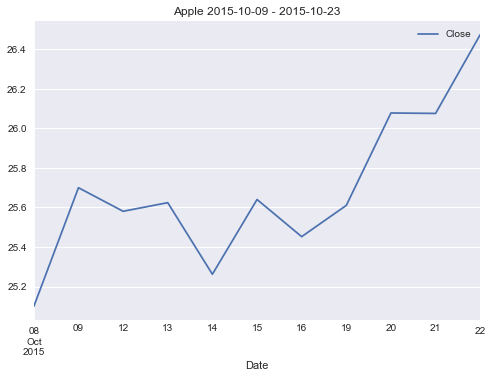

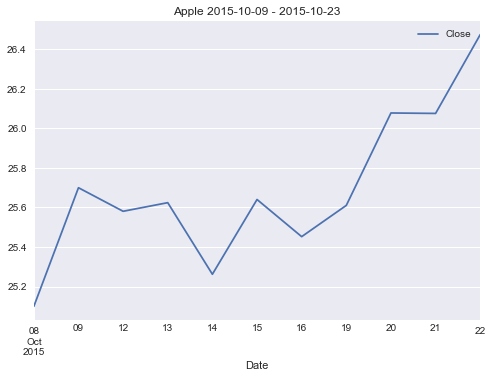

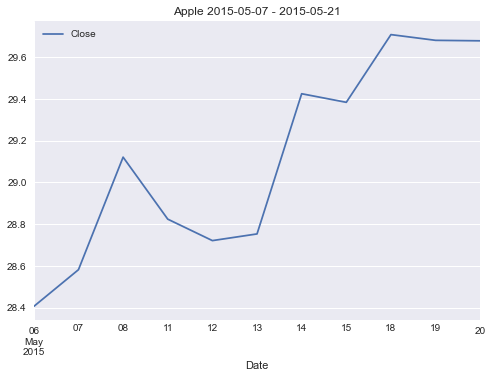

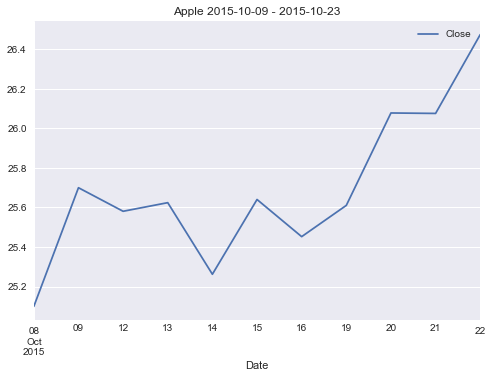

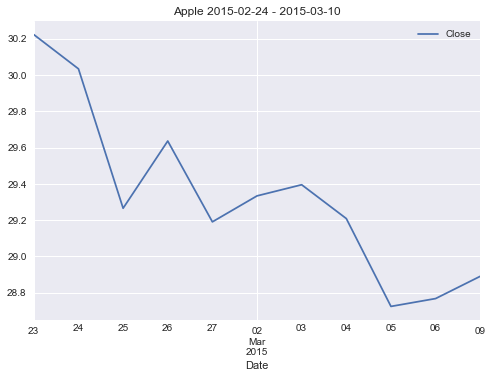

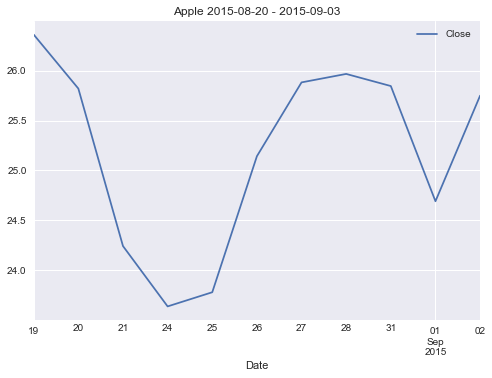

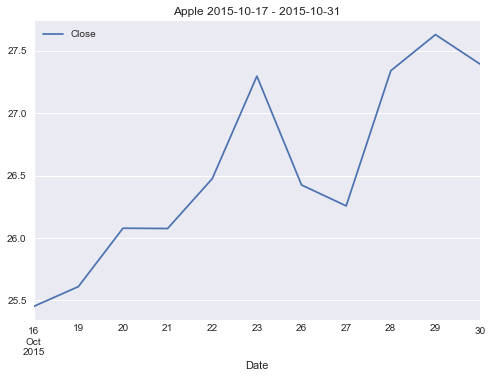

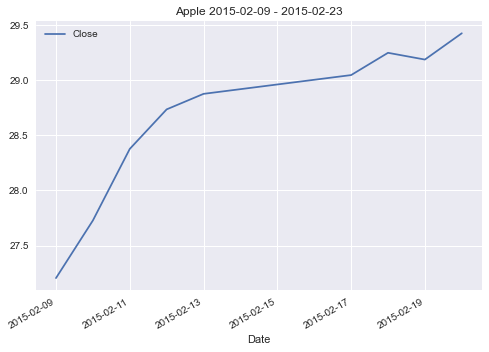

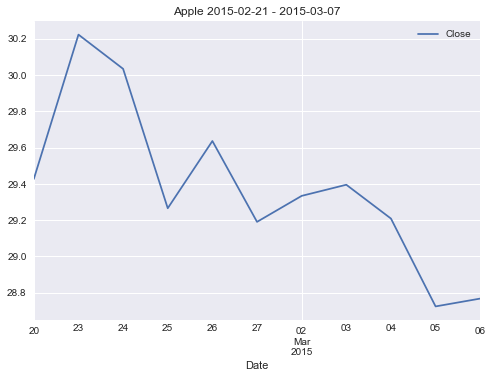

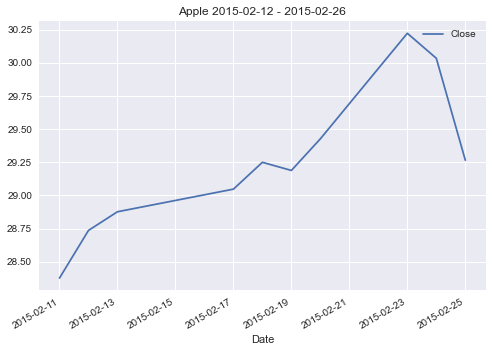

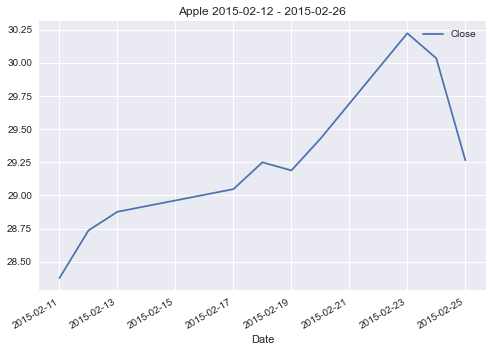

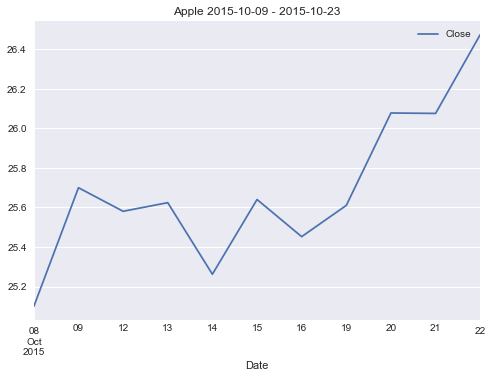

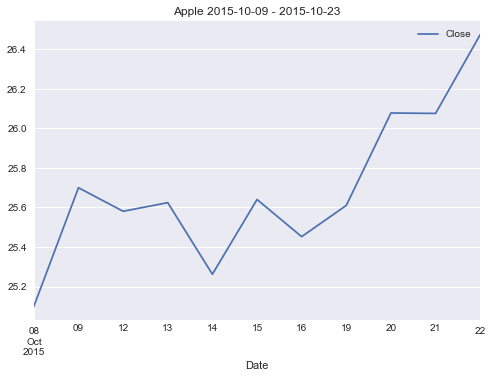

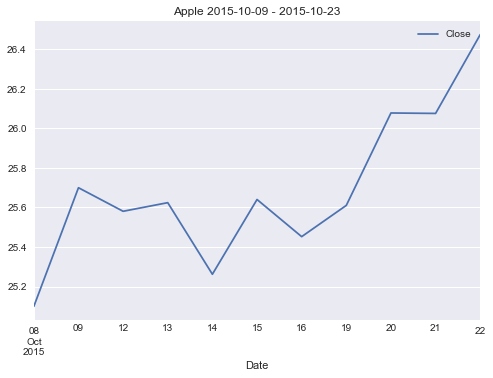

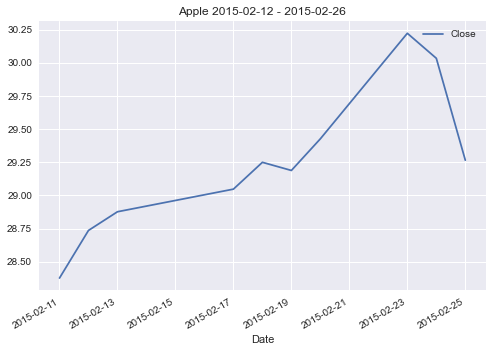

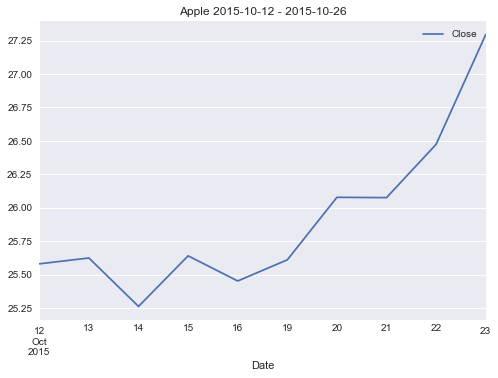

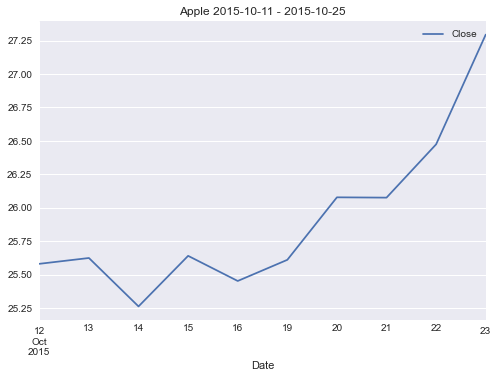

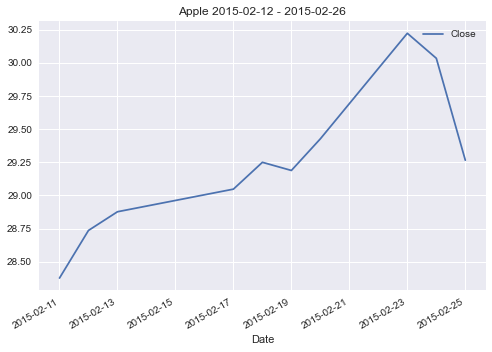

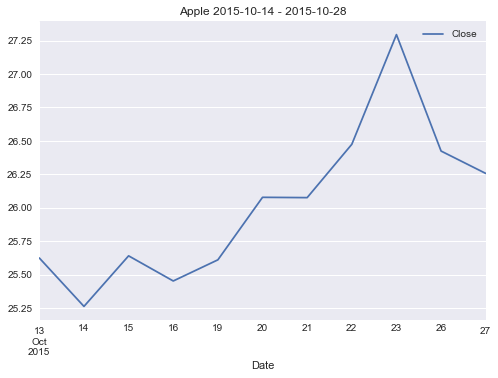

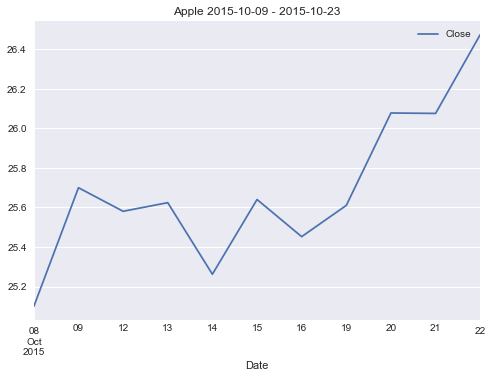

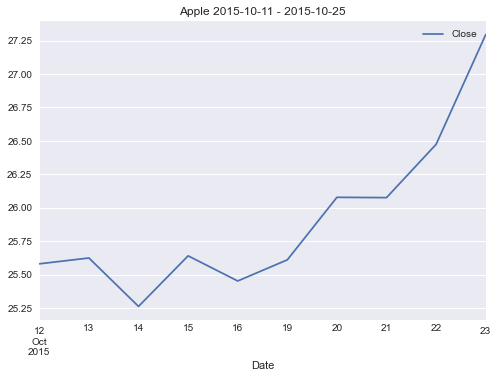

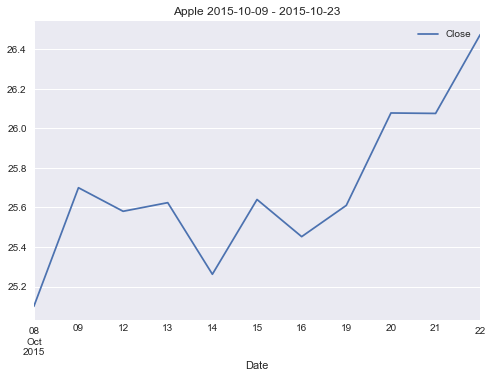

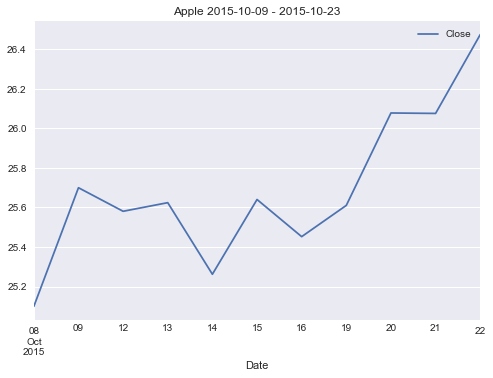

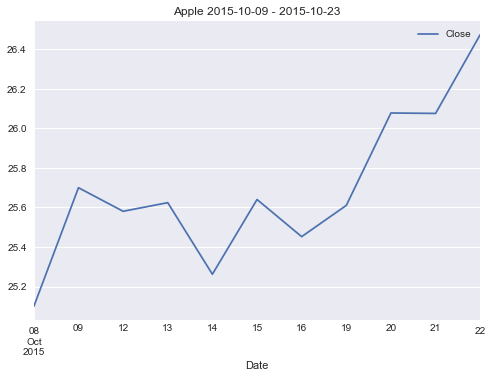

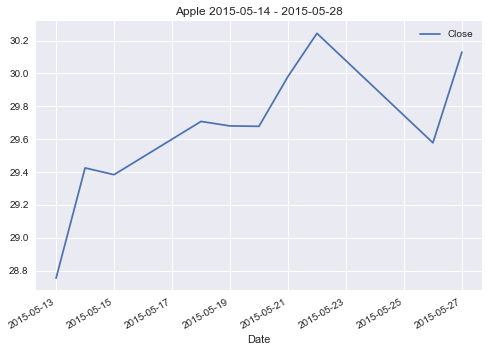

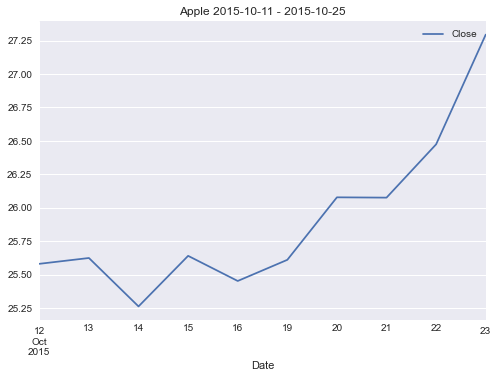

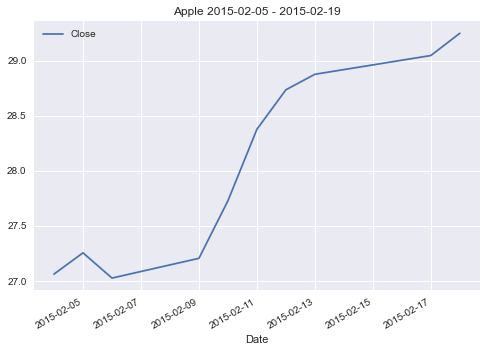

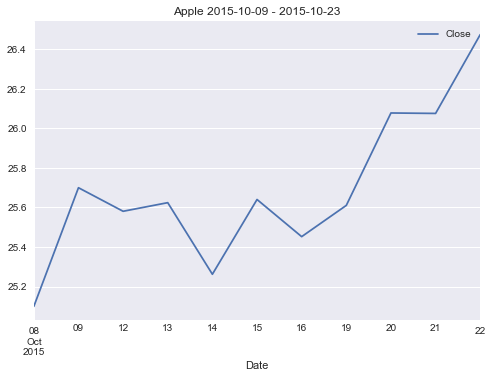

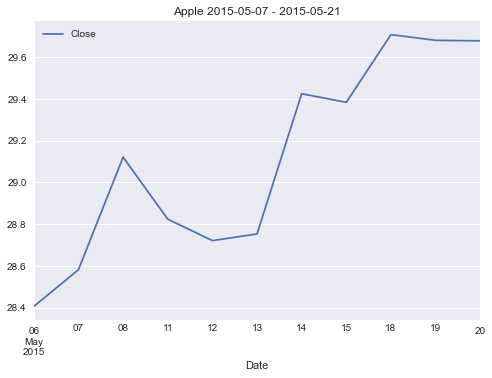

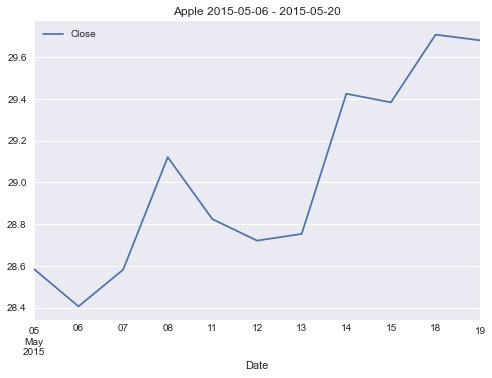

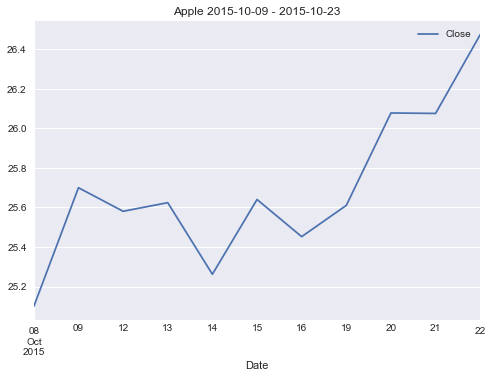

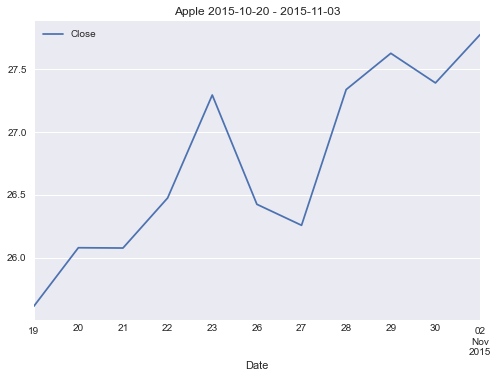

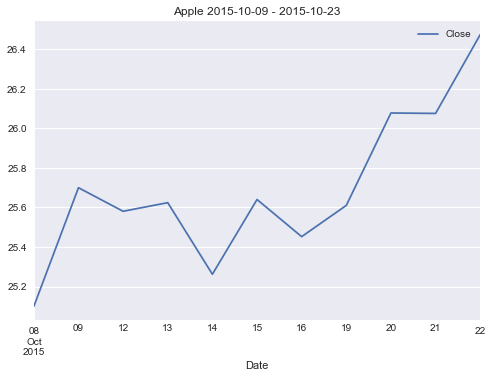

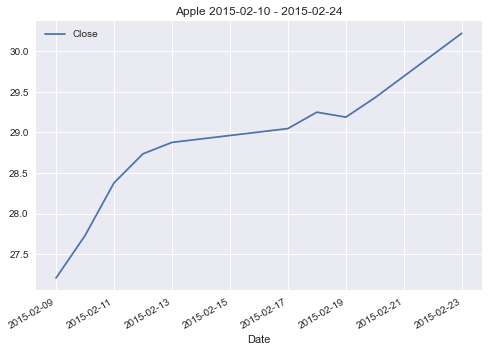

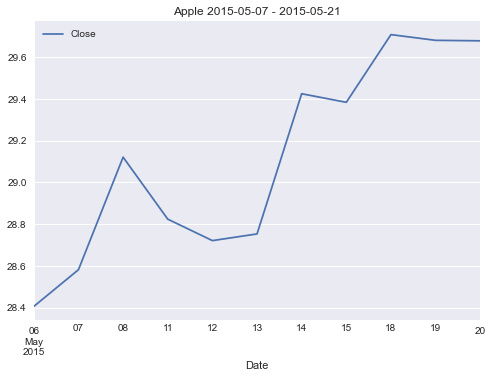

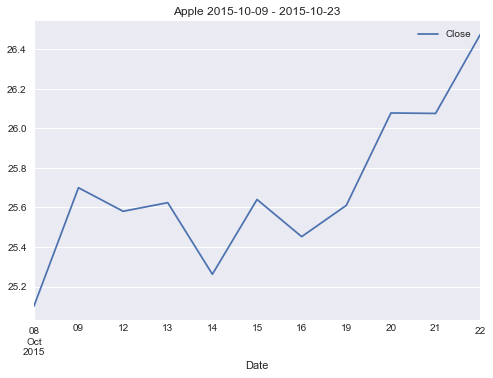

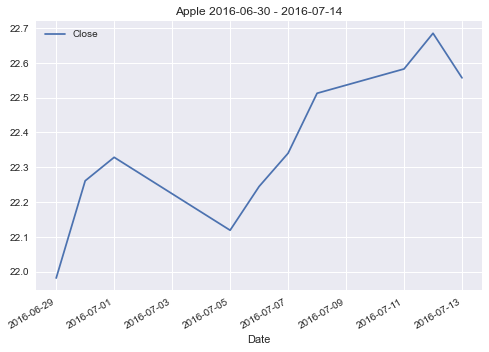

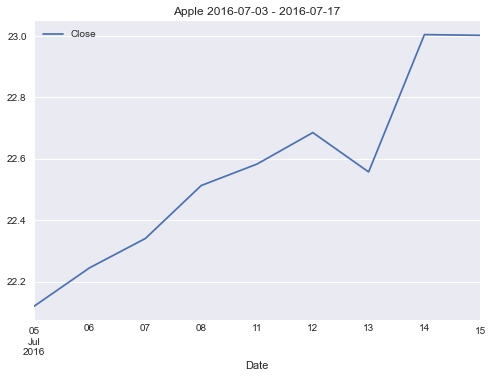

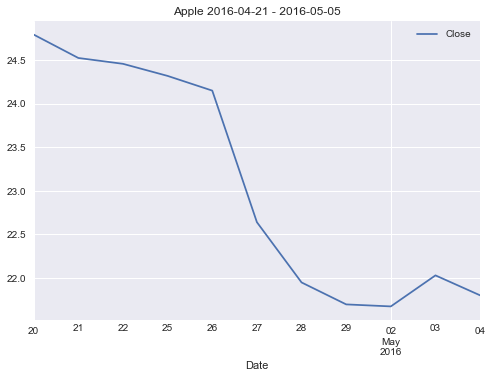

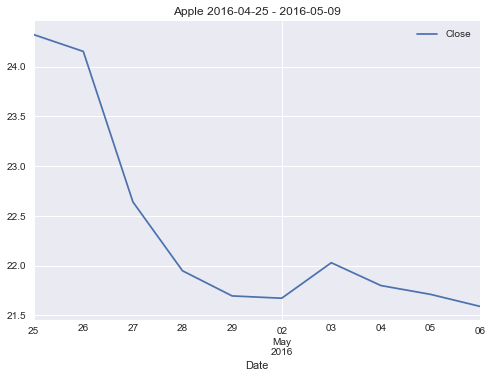

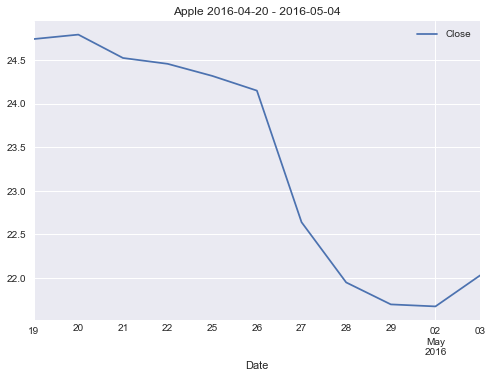

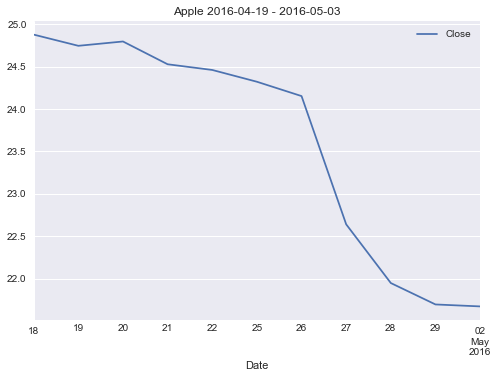

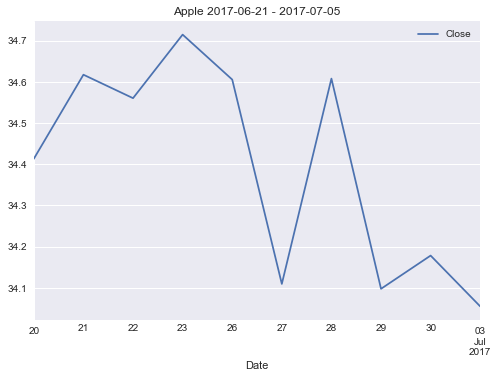

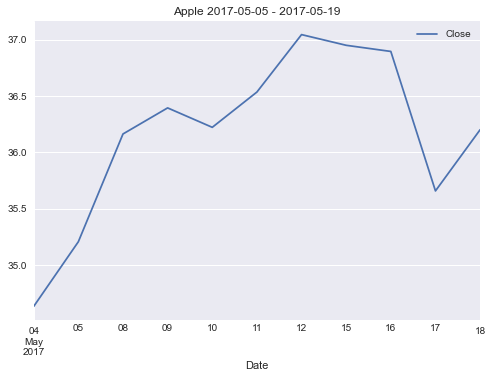

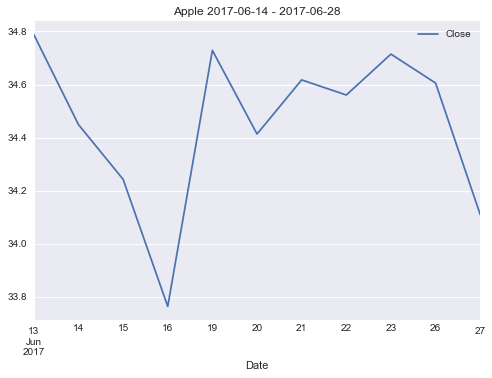

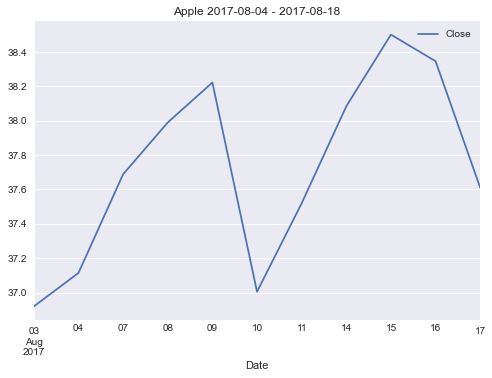

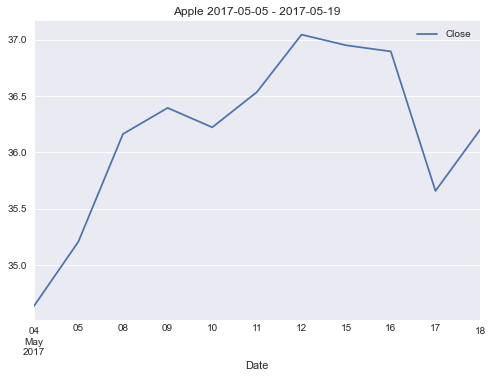

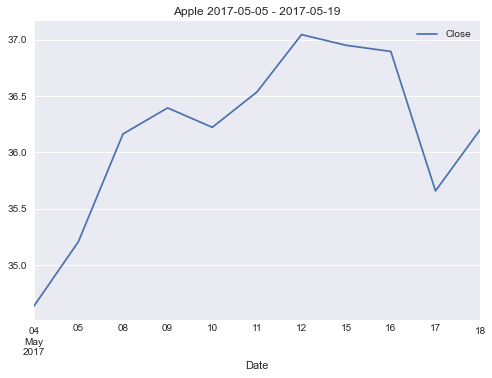

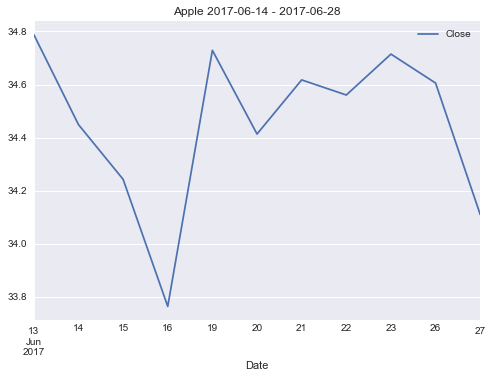

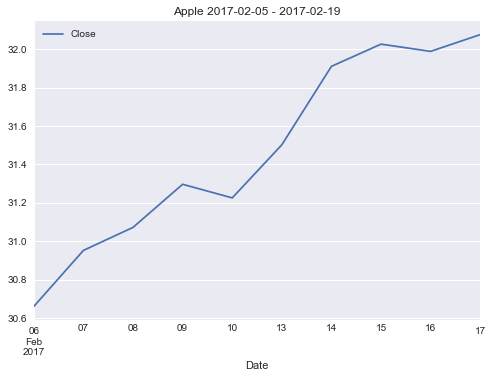

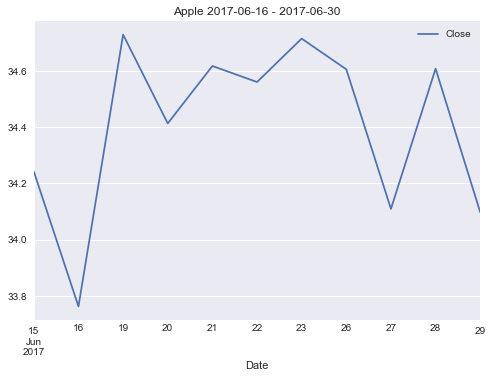

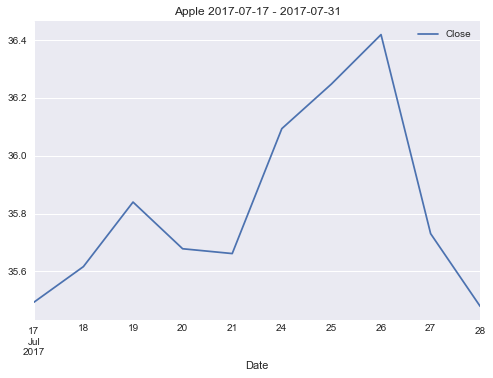

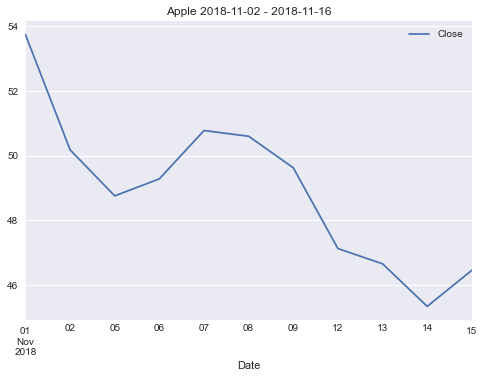

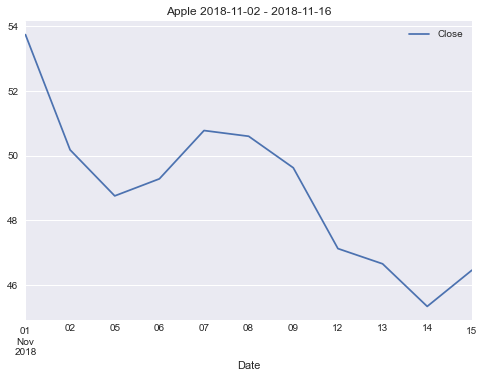

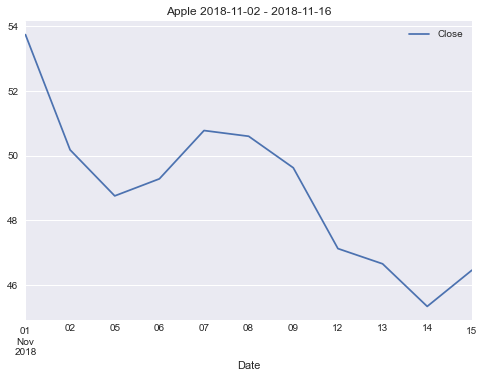

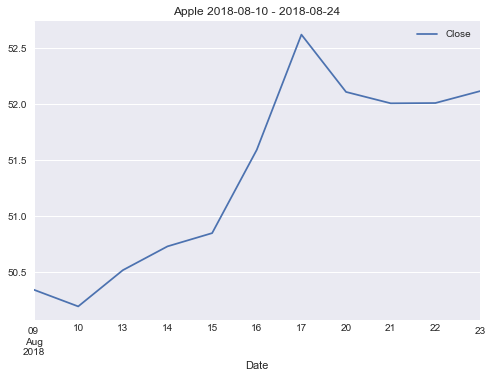

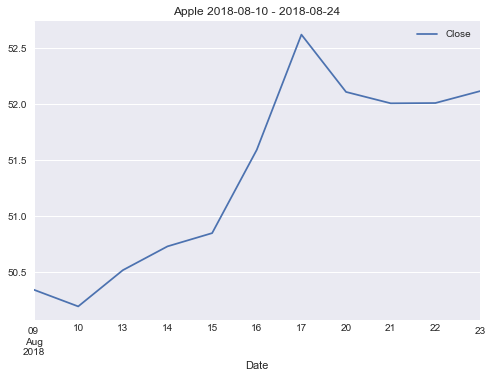

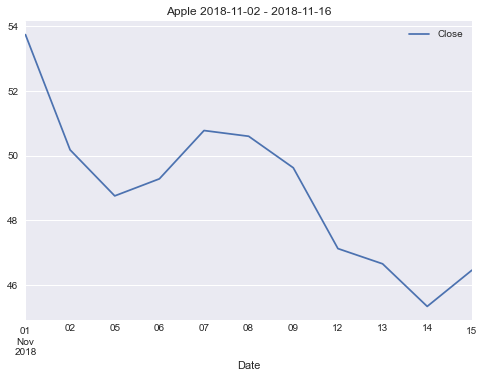

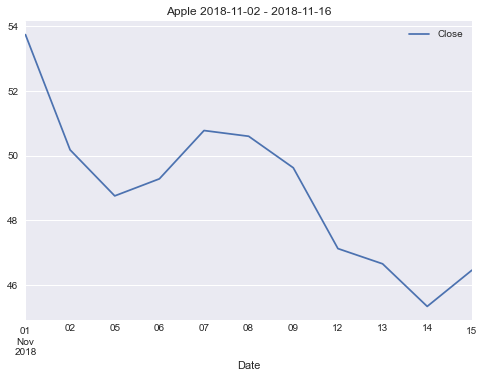

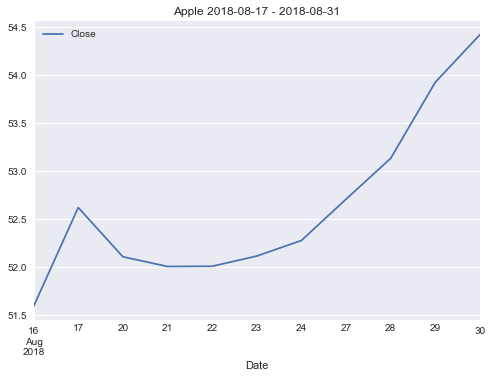

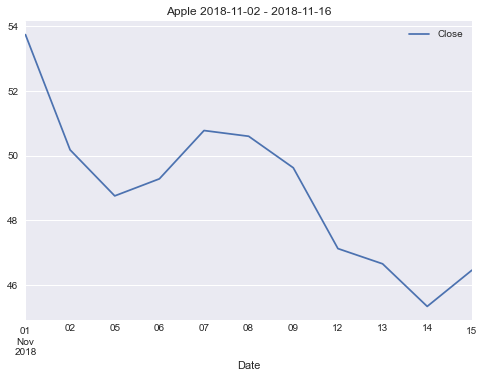

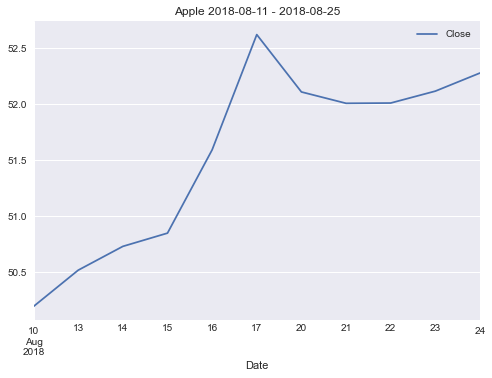

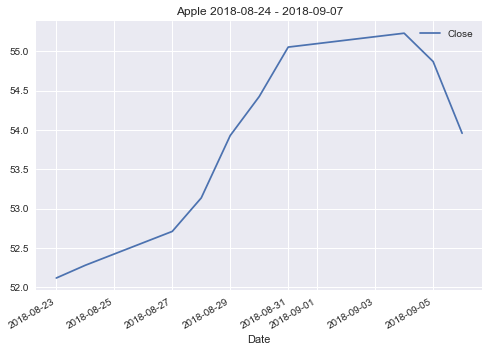

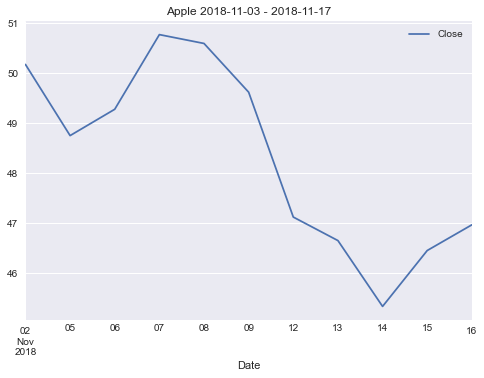

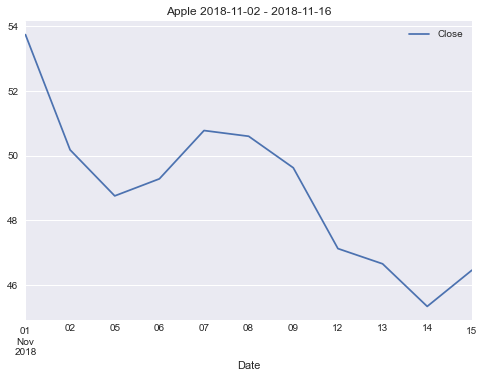

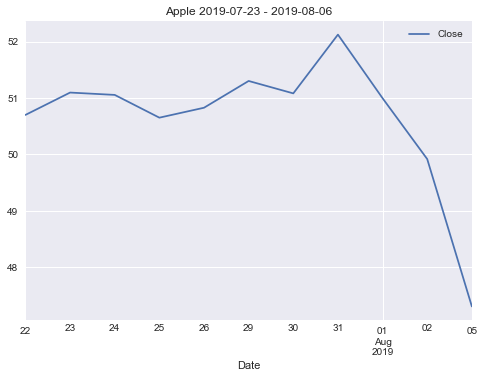

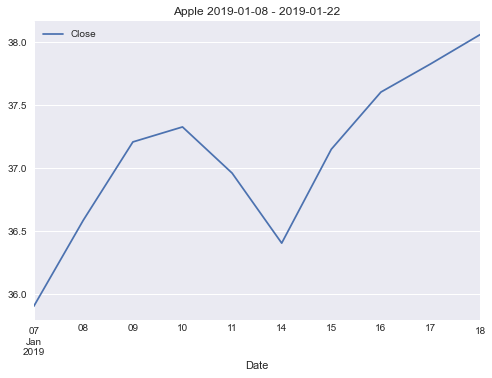

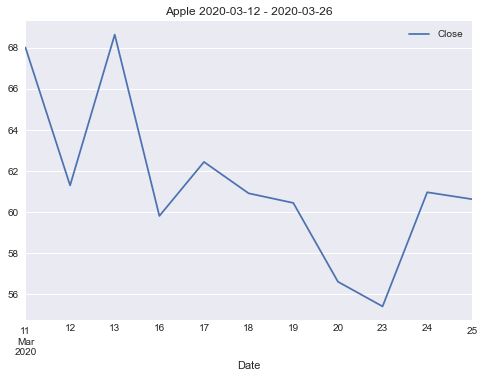

In [5]:
weeks = 2
days = 0

for i in range(len(apples)):
    start_date, end_date = get_dates(apples.iloc[i]['date'], weeks, days)
    stock_df = stock_history(apples.iloc[i]['ORG'], start_date, end_date, plot=True)

In [6]:
df = pd.read_csv('data/all-Elon Musk-quotes.csv.bz2',compression='bz2')
data2015 = df[df['date'].str.match(r'([2][0][1][5])')]
data2016 = df[df['date'].str.match(r'([2][0][1][6])')]
data2017 = df[df['date'].str.match(r'([2][0][1][7])')]
data2018 = df[df['date'].str.match(r'([2][0][1][8])')]
data2019 = df[df['date'].str.match(r'([2][0][1][9])')]
data2020 = df[df['date'].str.match(r'([2][0][2][0])')]
data2015.tail()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
5277,2015-05-12-024757,I'd Never Tell a Man to Miss His Child's Birth...,Elon Musk,['Q317521'],2015-05-12 12:25:44,1,"[['Elon Musk', '0.5547'], ['Chris Urmson', '0....",['http://www.craveonline.com/lifestyle/tech-an...,E
5278,2015-04-14-052314,"Looks like Falcon landed fine,",Elon Musk,['Q317521'],2015-04-14 21:44:29,1,"[['Elon Musk', '0.9054'], ['None', '0.0946']]",['http://al.com/news/index.ssf/2015/04/spacex_...,E
5279,2015-05-30-004517,half the $89k price point of the Tesla Roadste...,Elon Musk,['Q317521'],2015-05-30 15:00:00,1,"[['Elon Musk', '0.7458'], ['None', '0.2542']]",['http://www.latimes.com/business/autos/la-fi-...,E
5280,2015-10-28-039661,I don't want to overplay or overstate at this ...,Elon Musk,['Q317521'],2015-10-28 15:26:11,3,"[['Elon Musk', '0.8971'], ['None', '0.0786'], ...",['http://feeds.businessinsider.com.au/~/120892...,E
5281,2015-04-30-019471,"Rocket launch good, satellite in geo transfer ...",Elon Musk,['Q317521'],2015-04-30 06:24:13,2,"[['Elon Musk', '0.8873'], ['None', '0.1127']]",['http://zeenews.india.com/news/space/spacex-s...,E


### First let's plot frequency of his quotes over the 5 years 

[5282, 4568, 9213, 14183, 8533, 1822]


Text(0, 0.5, 'Number of quotes of Elon Musk')

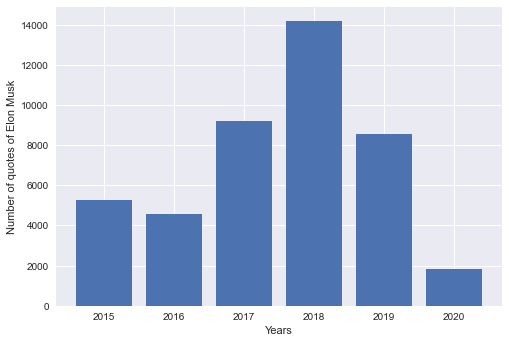

In [7]:
size15 = len(data2015)
size16 = len(data2016)
size17 = len(data2017)
size18 = len(data2018)
size19 = len(data2019)
size20 = len(data2020) 

years = [2015,2016,2017,2018,2019,2020]
size  = [size15,size16,size17,size18,size19,size20]
print(size)
plt.bar(years,size)
plt.xlabel("Years" )
plt.ylabel ("Number of quotes of Elon Musk")

###  For each company that he talks about, plot of the frequency of his quotes about it over the 5 year 

In [8]:
elon_org_date15 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][1][5])')]
elon_org_date16 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][1][6])')]
elon_org_date17 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][1][7])')]
elon_org_date18 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][1][8])')]
elon_org_date19 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][1][9])')]
elon_org_date20 = elon_org_df[elon_org_df['date'].str.match(r'([2][0][2][0])')]

In [9]:
org_count_date15 = elon_org_date15.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_date16 = elon_org_date16.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_date17 = elon_org_date17.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_date18 = elon_org_date18.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_date19 = elon_org_date19.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_date20 = elon_org_date20.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)

In [10]:
def PlotByOrg (organisation):
    size15 = org_count_date15[org_count_date15['ORG']== organisation].iloc[0]['counts']
    size16 = org_count_date16[org_count_date16['ORG']== organisation].iloc[0]['counts']
    size17 = org_count_date17[org_count_date17['ORG']== organisation].iloc[0]['counts']
    size18 = org_count_date18[org_count_date18['ORG']== organisation].iloc[0]['counts']
    size19 = org_count_date19[org_count_date19['ORG']== organisation].iloc[0]['counts']
    size20 = org_count_date20[org_count_date20['ORG']== organisation].iloc[0]['counts']
    size =[size15,size16,size17,size18,size19,size20]
    #print(size)
    plt.bar(years,size)
    plt.xlabel("Years" )
    plt.ylabel ("Number of quotes of Elon Musk about"+ organisation)

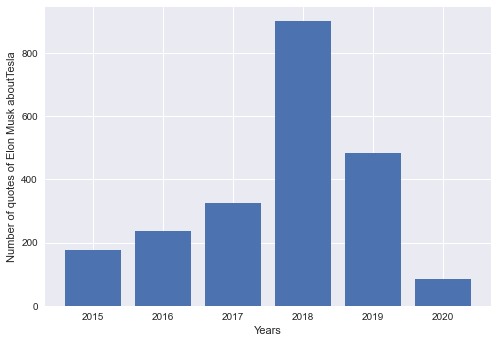

In [11]:
PlotByOrg("Tesla")

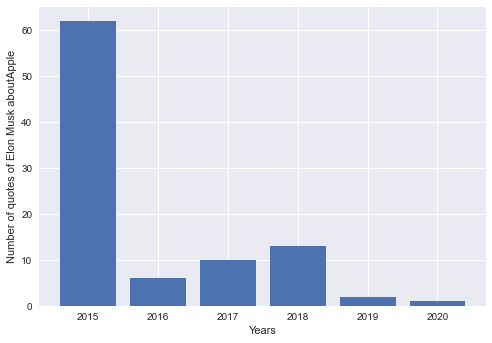

In [12]:
PlotByOrg("Apple")

## 1
VADER sentiment analyzer : a NLP algo which output the postive (1) or negative(0) sentiments expressend in the quites.

## 2
Correlation does not imply causality : We want to check for causality in this case and not the correlation. We are using the material seen in class to state that a good answer to this problem is to develop an observational studie.
Either take a compagnie similar to the one elon Musk talks about for example ( Apple/Samsung). check that elon musk does not talk about this compagnie during the time laps that we study the price market of this experience. 